# Import Libraries

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

# Load Data

In [131]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Information About Data

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Statistical information

In [133]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Check Missing Values

In [134]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Check Duplication Value

In [135]:
df.duplicated().sum()

18078

In [136]:
df.drop_duplicates(inplace=True)

# size of Data

In [137]:
print('Number of Rows :', df.shape[0])
print('Number of Columns :', df.shape[1])

Number of Rows : 301717
Number of Columns : 18


In [138]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


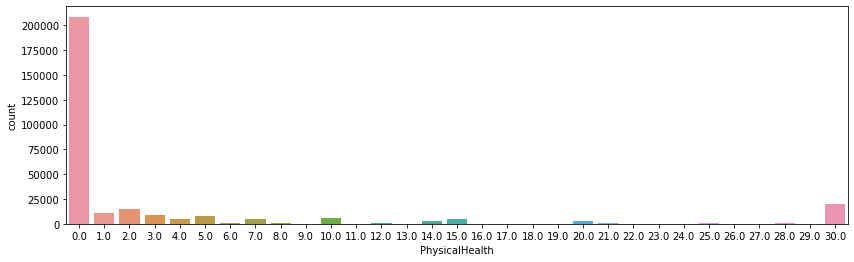

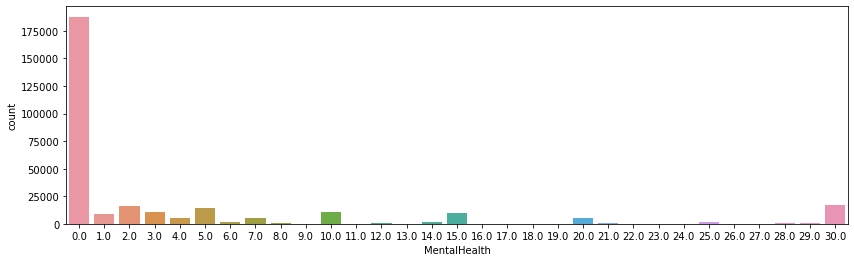

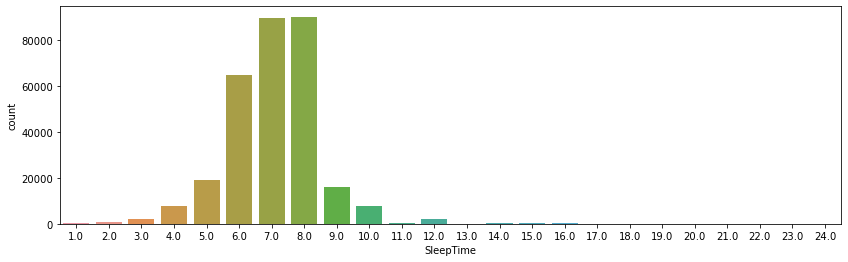

In [139]:
for col in df[['PhysicalHealth','MentalHealth', 'SleepTime']]:
    plt.figure(figsize=(14,4))
    sns.countplot(df[col])

# Pre_processing data

In [140]:
def mapping(x):
    if x == 0:
        return '0'
    elif x in range(1,10):
            return '1-9'
    elif x in range(10,20):
        return '10-19'
    elif x in range(20,30):
        return '20-29'
    elif x == 30:
        return '30'

In [141]:
df['PhysicalHealth'] = df['PhysicalHealth'].apply(mapping)
df['MentalHealth'] = df['MentalHealth'].apply(mapping)

In [142]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,1-9,30,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20-29,30,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,20-29,0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [143]:
def change(x):
    if x in range(1,5):
        return '1-4'
    elif x in range(4,7):
        return '4-6'
    elif x in range(6,9):
        return '6-8'
    elif x in range(8,13):
        return '8-12'
    elif x in range(12,25):
        return '12-24'

In [144]:
df['SleepTime'] = df['SleepTime'].apply(change)

In [145]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,1-9,30,No,Female,55-59,White,Yes,Yes,Very good,4-6,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,6-8,No,No,No
2,No,26.58,Yes,No,No,20-29,30,No,Male,65-69,White,Yes,Yes,Fair,6-8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,4-6,No,No,Yes
4,No,23.71,No,No,No,20-29,0,Yes,Female,40-44,White,No,Yes,Very good,6-8,No,No,No


In [146]:
def bmi_change(x):
    if x < 18.5:
        return 'Underweight'
    elif x >= 18.5 and x < 25:
        return 'Normalweigt'
    elif x >= 25 and x < 30:
        return 'Overweight'
    else :
        return 'Obesity'

In [147]:
df['BMI'] = df['BMI'].apply(bmi_change)

In [148]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,Underweight,Yes,No,No,1-9,30,No,Female,55-59,White,Yes,Yes,Very good,4-6,Yes,No,Yes
1,No,Normalweigt,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,6-8,No,No,No
2,No,Overweight,Yes,No,No,20-29,30,No,Male,65-69,White,Yes,Yes,Fair,6-8,Yes,No,No
3,No,Normalweigt,No,No,No,0,0,No,Female,75-79,White,No,No,Good,4-6,No,No,Yes
4,No,Normalweigt,No,No,No,20-29,0,Yes,Female,40-44,White,No,Yes,Very good,6-8,No,No,No


In [149]:
df.dtypes

HeartDisease        object
BMI                 object
Smoking             object
AlcoholDrinking     object
Stroke              object
PhysicalHealth      object
MentalHealth        object
DiffWalking         object
Sex                 object
AgeCategory         object
Race                object
Diabetic            object
PhysicalActivity    object
GenHealth           object
SleepTime           object
Asthma              object
KidneyDisease       object
SkinCancer          object
dtype: object

# See Categorical Features

In [150]:
cat_col = df.select_dtypes('O')
cat_col

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,Underweight,Yes,No,No,1-9,30,No,Female,55-59,White,Yes,Yes,Very good,4-6,Yes,No,Yes
1,No,Normalweigt,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,6-8,No,No,No
2,No,Overweight,Yes,No,No,20-29,30,No,Male,65-69,White,Yes,Yes,Fair,6-8,Yes,No,No
3,No,Normalweigt,No,No,No,0,0,No,Female,75-79,White,No,No,Good,4-6,No,No,Yes
4,No,Normalweigt,No,No,No,20-29,0,Yes,Female,40-44,White,No,Yes,Very good,6-8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Overweight,Yes,No,No,1-9,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,4-6,Yes,No,No
319791,No,Overweight,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,4-6,Yes,No,No
319792,No,Normalweigt,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,4-6,No,No,No
319793,No,Obesity,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,8-12,No,No,No


In [151]:
df['Diabetic'].value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [152]:
df['Diabetic'] = df['Diabetic'].replace('No, borderline diabetes', 'No')
df['Diabetic'] = df['Diabetic'].replace('Yes (during pregnancy)', 'Yes')

In [153]:
df['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

# Visualize Categorical Features 

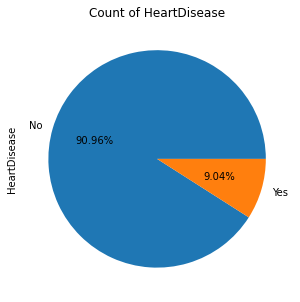

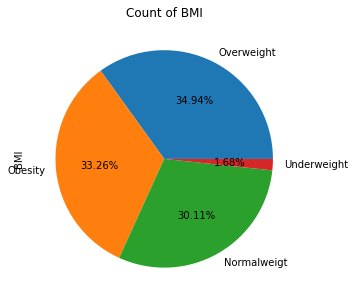

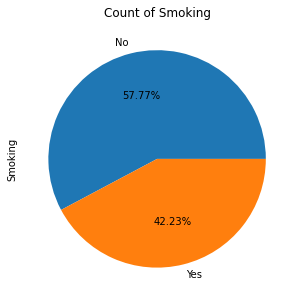

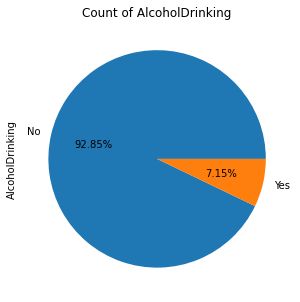

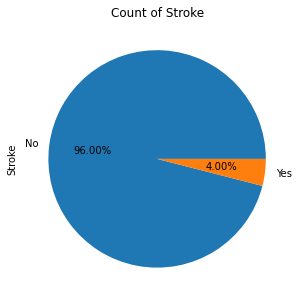

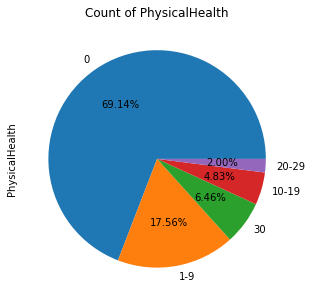

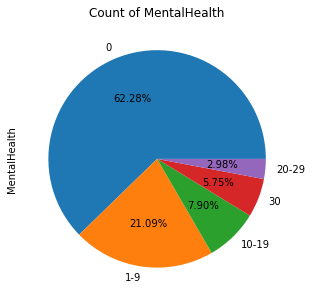

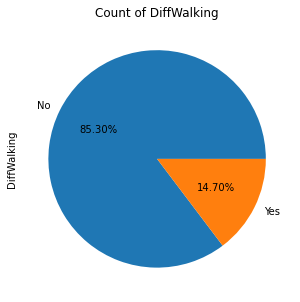

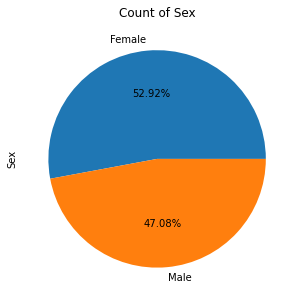

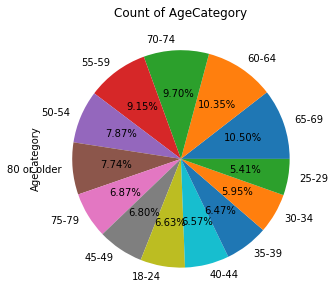

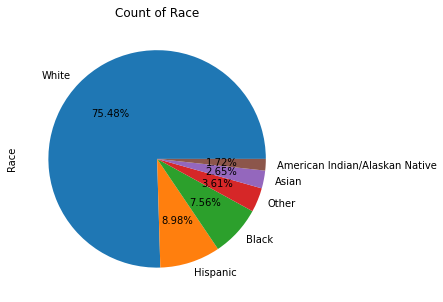

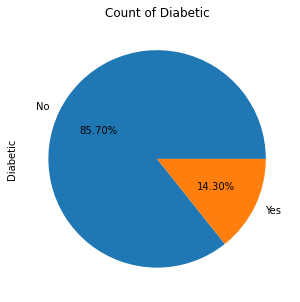

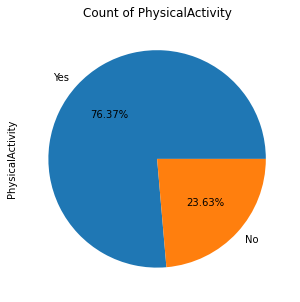

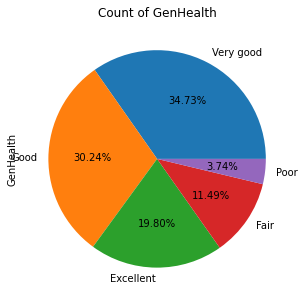

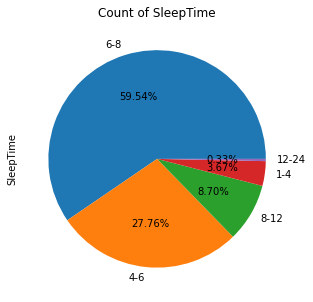

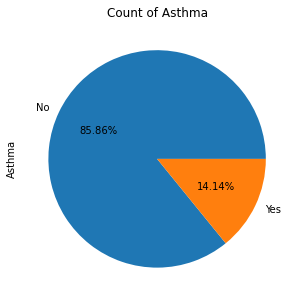

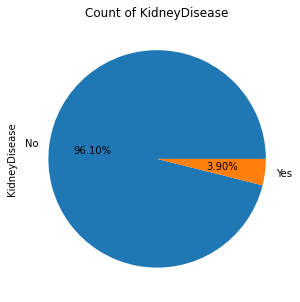

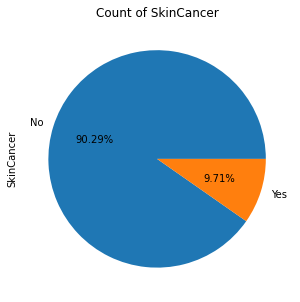

In [154]:
for col in cat_col:
    plt.figure(figsize=(10,5))
    df[col].value_counts().plot.pie(autopct='%.2f%%')    
    plt.title(f'Count of {col}')
    plt.show()

# Visualize Categorical Features Wtih Target

AxesSubplot(0.125,0.125;0.775x0.755) 



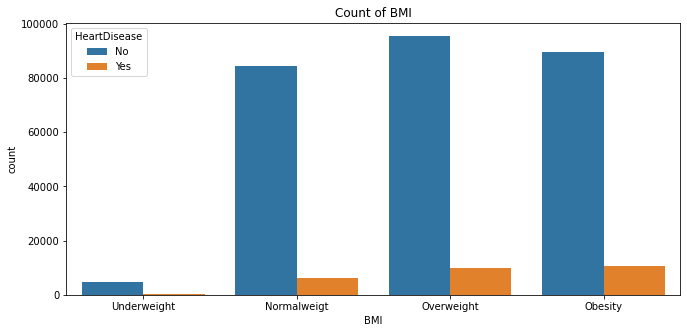

AxesSubplot(0.125,0.125;0.775x0.755) 



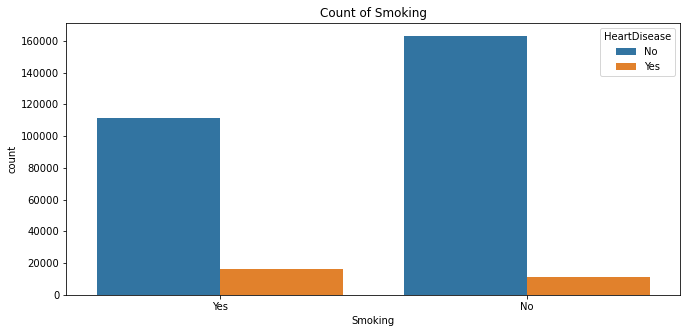

AxesSubplot(0.125,0.125;0.775x0.755) 



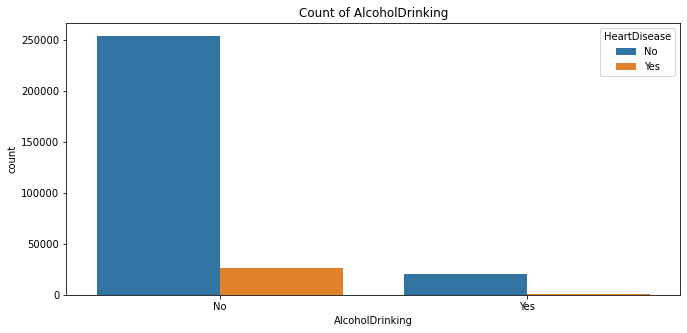

AxesSubplot(0.125,0.125;0.775x0.755) 



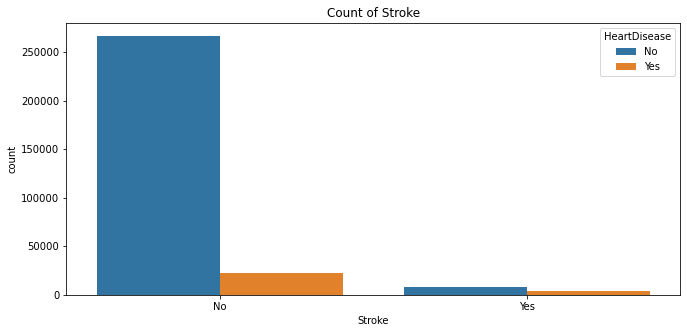

AxesSubplot(0.125,0.125;0.775x0.755) 



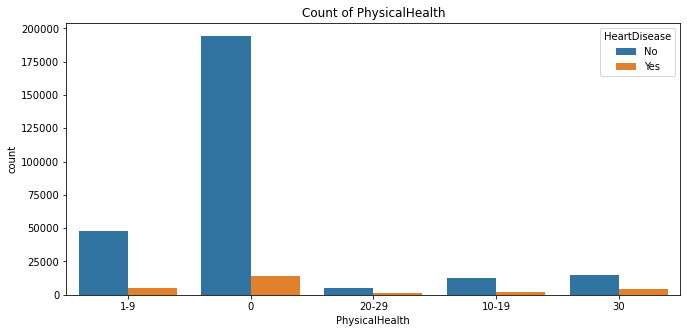

AxesSubplot(0.125,0.125;0.775x0.755) 



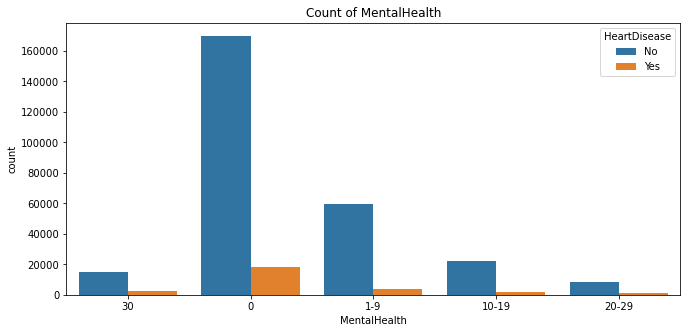

AxesSubplot(0.125,0.125;0.775x0.755) 



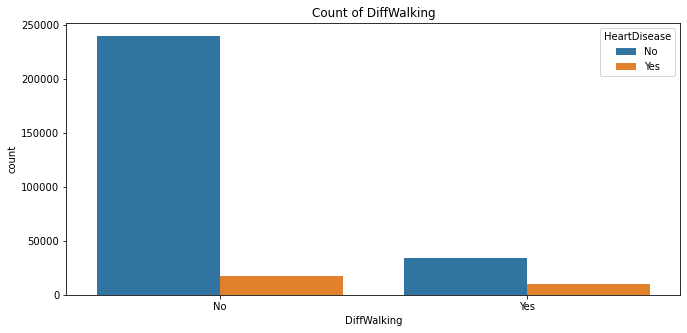

AxesSubplot(0.125,0.125;0.775x0.755) 



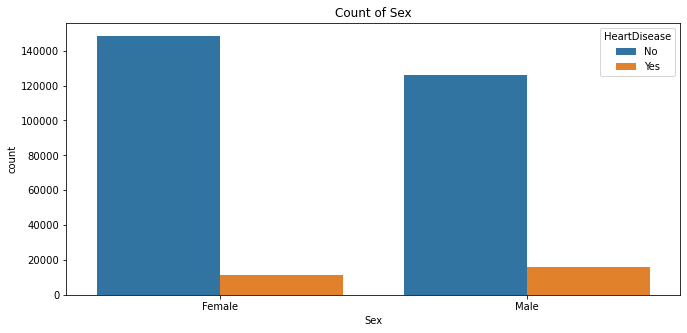

AxesSubplot(0.125,0.125;0.775x0.755) 



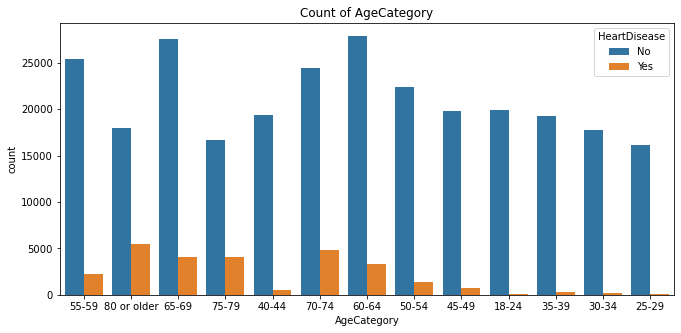

AxesSubplot(0.125,0.125;0.775x0.755) 



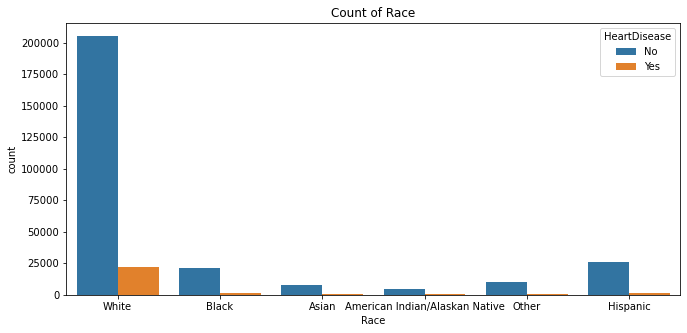

AxesSubplot(0.125,0.125;0.775x0.755) 



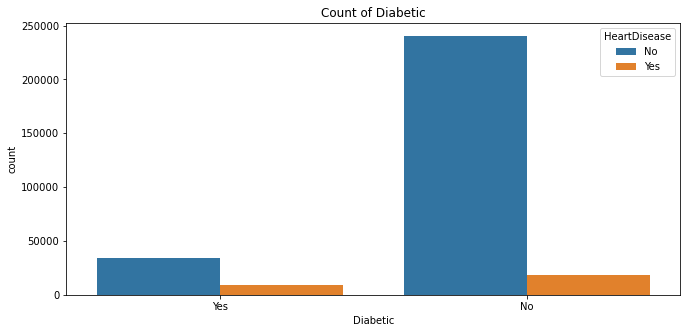

AxesSubplot(0.125,0.125;0.775x0.755) 



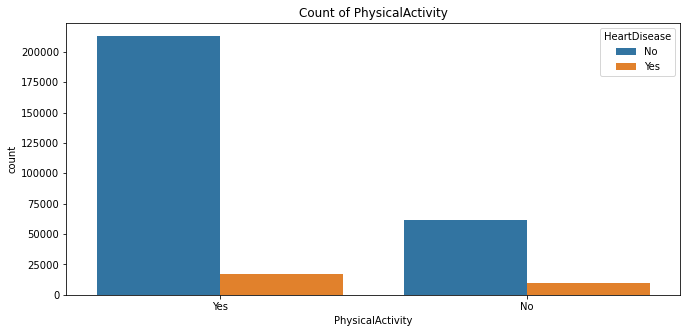

AxesSubplot(0.125,0.125;0.775x0.755) 



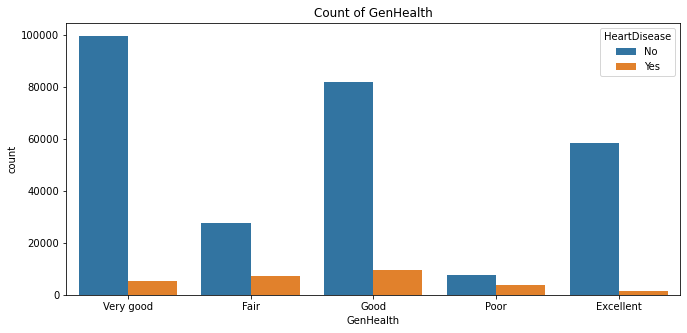

AxesSubplot(0.125,0.125;0.775x0.755) 



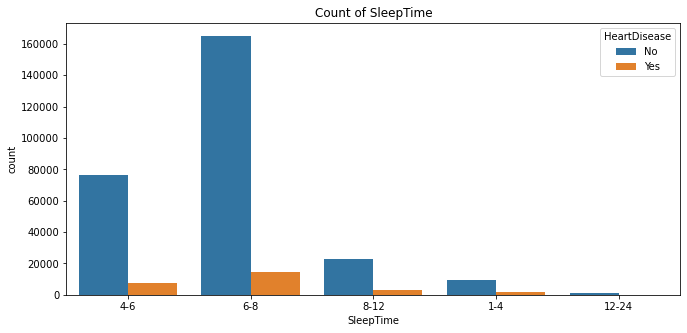

AxesSubplot(0.125,0.125;0.775x0.755) 



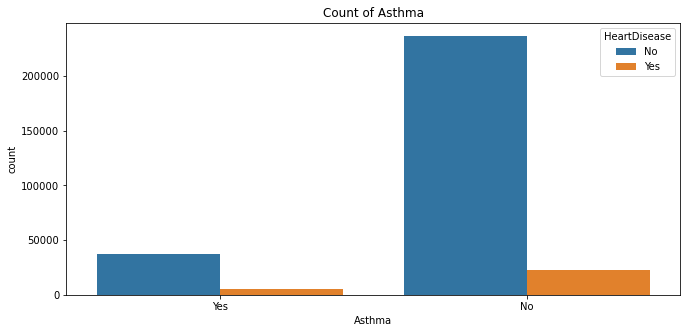

AxesSubplot(0.125,0.125;0.775x0.755) 



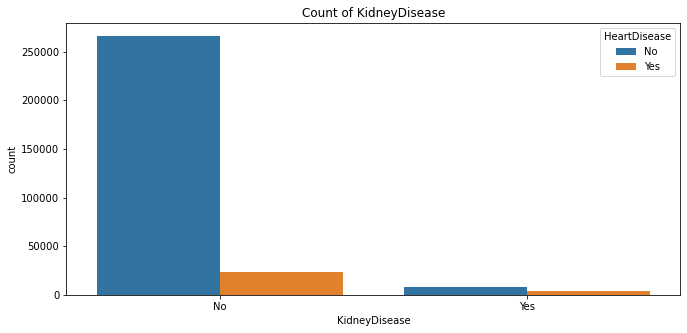

AxesSubplot(0.125,0.125;0.775x0.755) 



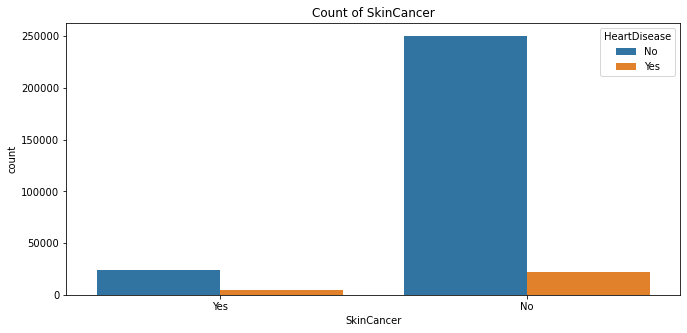

In [155]:
for col in cat_col:
    if col != 'HeartDisease' :
        plt.figure(figsize=(11,5))
        print(sns.countplot(df[col], hue=df['HeartDisease']),'\n')
        plt.title(f'Count of {col}')
        plt.show()

# Encoding Data

In [156]:
df.columns[1:]

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [157]:
df['HeartDisease'] = df['HeartDisease'].map({'Yes':1, 'No':0})

In [158]:
df = pd.get_dummies(data=df, columns=df.columns[1:], drop_first=True)

In [159]:
df

,HeartDisease,BMI_Obesity,BMI_Overweight,BMI_Underweight,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,PhysicalHealth_1-9,PhysicalHealth_10-19,PhysicalHealth_20-29,...,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,SleepTime_12-24,SleepTime_4-6,SleepTime_6-8,SleepTime_8-12,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
319791,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
319792,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
319793,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [160]:
df.shape

(301717, 47)

# Deal with Imbalanced classes . 
 
## Use SMOTE CLass Because it's Better . 

In [164]:
sm = SMOTE(random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('HeartDisease', axis=1), df['HeartDisease'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [165]:
X = oversampled.drop('HeartDisease', axis=1)
Y = oversampled['HeartDisease']

# Split Data into Features and Target

In [166]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)            

# Make scaling to make all values has one range .

In [167]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Now, After we finished our analysis ,we will build many techniques to train and predict then select best technique .

## LogisticRegression

In [172]:
clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
y_pred_1 = clf1.predict(x_test)
print(f'Training Accuracy: {clf1.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_1)}')
print(confusion_matrix(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))
print(f'Testing Recall: {recall_score(y_test, y_pred_1)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_1)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_1)}')
print('-'*30)

Training Accuracy: 0.846746627984032
Testing Accuracy: 0.8474536130366268
[[49435  5468]
 [11279 43601]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.86     54903
           1       0.89      0.79      0.84     54880

    accuracy                           0.85    109783
   macro avg       0.85      0.85      0.85    109783
weighted avg       0.85      0.85      0.85    109783

Testing Recall: 0.7944788629737609
Testing Precesion: 0.8885650818235545
Testing F-1: 0.8388921490346227
------------------------------


## Navie Bayes

In [173]:
clf2 = GaussianNB()
clf2.fit(x_train, y_train)
y_pred_2 = clf2.predict(x_test)
print(f'Training Accuracy: {clf2.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_2)}')
print(confusion_matrix(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))
print(f'Testing Recall: {recall_score(y_test, y_pred_2)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_2)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_2)}')
print('-'*30)

Training Accuracy: 0.8164616775480553
Testing Accuracy: 0.816838672654236
[[54840    63]
 [20045 34835]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85     54903
           1       1.00      0.63      0.78     54880

    accuracy                           0.82    109783
   macro avg       0.87      0.82      0.81    109783
weighted avg       0.87      0.82      0.81    109783

Testing Recall: 0.6347485422740525
Testing Precesion: 0.9981947389535217
Testing F-1: 0.7760253068680524
------------------------------


## DecisionTree

In [174]:
clf4 = DecisionTreeClassifier()
clf4.fit(x_train, y_train) 
y_pred_4 = clf4.predict(x_test)
print(f'Training Accuracy: {clf4.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_4)}')
print(confusion_matrix(y_test, y_pred_4))
print(classification_report(y_test, y_pred_4))
print(f'Testing Recall: {recall_score(y_test, y_pred_4)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_4)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_4)}')
print('-'*30)

Training Accuracy: 0.9374193004789025
Testing Accuracy: 0.8900285107894665
[[48150  6753]
 [ 5320 49560]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     54903
           1       0.88      0.90      0.89     54880

    accuracy                           0.89    109783
   macro avg       0.89      0.89      0.89    109783
weighted avg       0.89      0.89      0.89    109783

Testing Recall: 0.9030612244897959
Testing Precesion: 0.8800809759735763
Testing F-1: 0.8914230212333509
------------------------------


## RandomForest (bagging)

In [175]:
clf5 = RandomForestClassifier()
clf5.fit(x_train, y_train) 
y_pred_5 = clf5.predict(x_test)
print(f'Training Accuracy: {clf5.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_5)}')
print(confusion_matrix(y_test, y_pred_5))
print(classification_report(y_test, y_pred_5))
print(f'Testing Recall: {recall_score(y_test, y_pred_5)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_5)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_5)}')
print('-'*30)

Training Accuracy: 0.9374101915382496
Testing Accuracy: 0.9052585555140595
[[49591  5312]
 [ 5089 49791]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     54903
           1       0.90      0.91      0.91     54880

    accuracy                           0.91    109783
   macro avg       0.91      0.91      0.91    109783
weighted avg       0.91      0.91      0.91    109783

Testing Recall: 0.9072704081632653
Testing Precesion: 0.9035987151334773
Testing F-1: 0.90543083931153
------------------------------


## XGboost (boosting)

In [176]:
clf6 = XGBClassifier()
clf6.fit(x_train, y_train) 
y_pred_6 = clf6.predict(x_test)
print(f'Training Accuracy: {clf6.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_6)}')
print(confusion_matrix(y_test, y_pred_6))
print(classification_report(y_test, y_pred_6))
print(f'Testing Recall: {recall_score(y_test, y_pred_6)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_6)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_6)}')
print('-'*30)

[02:55:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.8662807512143357
Testing Accuracy: 0.865042857272984
[[49652  5251]
 [ 9565 45315]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     54903
           1       0.90      0.83      0.86     54880

    accuracy                           0.87    109783
   macro avg       0.87      0.87      0.86    109783
weighted avg       0.87      0.87      0.86    109783

Testing Recall: 0.8257106413994169
Testing Precesion: 0.8961555195190444
Testing F-1: 0.8594920622878061
------------------------------


## RandomForest has a high precision, recall and accuraccy , but i will choose DecisionTreebecause RandomForest has a large size when i saved it, so we will choose this model to build web application...

In [182]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train) 
y_pred = clf4.predict(x_test)
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Testing Recall: {recall_score(y_test, y_pred)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
print(f'Testing F-1: {f1_score(y_test, y_pred)}')
print('-'*30)

Training Accuracy: 0.9374193004789025
Testing Accuracy: 0.8900285107894665
[[48150  6753]
 [ 5320 49560]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     54903
           1       0.88      0.90      0.89     54880

    accuracy                           0.89    109783
   macro avg       0.89      0.89      0.89    109783
weighted avg       0.89      0.89      0.89    109783

Testing Recall: 0.9030612244897959
Testing Precesion: 0.8800809759735763
Testing F-1: 0.8914230212333509
------------------------------


In [198]:
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}).head(20)

,y_test,y_pred
374936,1,1
319916,1,1
56188,0,0
444156,1,1
170814,0,0
46835,1,1
111452,0,1
249172,0,0
440056,1,1
373478,1,1


### After Build Model , we need to save it to build web application

In [183]:
import joblib

In [193]:
joblib.dump(model, 'model.h5')    # save model

['model.h5']

In [194]:
joblib.dump(scaler, 'scaler.h5')  # save scaler

['scaler.h5']

In [195]:
X.columns

Index(['BMI_Obesity', 'BMI_Overweight', 'BMI_Underweight', 'Smoking_Yes',
       'AlcoholDrinking_Yes', 'Stroke_Yes', 'PhysicalHealth_1-9',
       'PhysicalHealth_10-19', 'PhysicalHealth_20-29', 'PhysicalHealth_30',
       'MentalHealth_1-9', 'MentalHealth_10-19', 'MentalHealth_20-29',
       'MentalHealth_30', 'DiffWalking_Yes', 'Sex_Male', 'AgeCategory_25-29',
       'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44',
       'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59',
       'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74',
       'AgeCategory_75-79', 'AgeCategory_80 or older', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_Yes', 'PhysicalActivity_Yes', 'GenHealth_Fair',
       'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good',
       'SleepTime_12-24', 'SleepTime_4-6', 'SleepTime_6-8', 'SleepTime_8-12',
       'Asthma_Yes', 'KidneyDisease_Yes', 'SkinCancer_Yes'],
      dtype='object'

In [196]:
len(X.columns)

46